In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
%matplotlib inline

In [79]:
digits = load_digits()

In [80]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [81]:
def plot_images(data, target, figsize=(20, 5), img_shape=(8,8)):
    plt.figure(figsize=figsize)
    for index, (image, label) in enumerate(zip(data[:5], target[:5])):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, img_shape), cmap=plt.cm.gray)
        plt.title("Training %i\n" % label, fontsize=20)

In [82]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Accuracy Score: {0}".format(score), size=15)

In [83]:
def get_misclassified_index(y_pred, y_test):
    misclassifications = []
    for index, (predicted, actual) in enumerate(zip(y_pred, y_test)):
        if predicted != actual:
            misclassifications.append(index)
    return misclassifications

In [84]:
def plot_misclassifications(misclassifications, figsize=(20, 4), img_shape=(8,8), limit=5):
    plt.figure(figsize=(20, 4))
    for index, wrong in enumerate(misclassifications[0:limit]):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(x_test[wrong], img_shape), cmap=plt.cm.gray)
        plt.title("Predicted: {} Actual: {}".format(y_pred[wrong], y_test[wrong]))

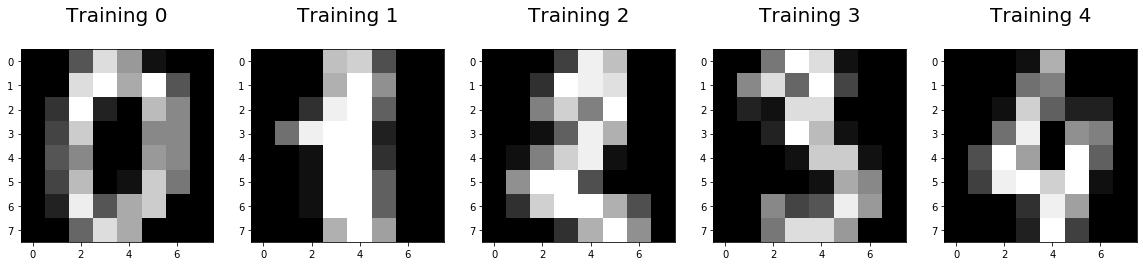

In [85]:
plot_images(digits.data, digits.target)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.25, random_state=0)

In [87]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
clf = LogisticRegression()

In [90]:
clf.fit(x_train, y_train)

C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
y_pred = clf.predict(x_test)

In [92]:
score = accuracy_score(y_pred, y_test)
print(score)

0.9533333333333334


In [93]:
cm = confusion_matrix(y_test, y_pred)

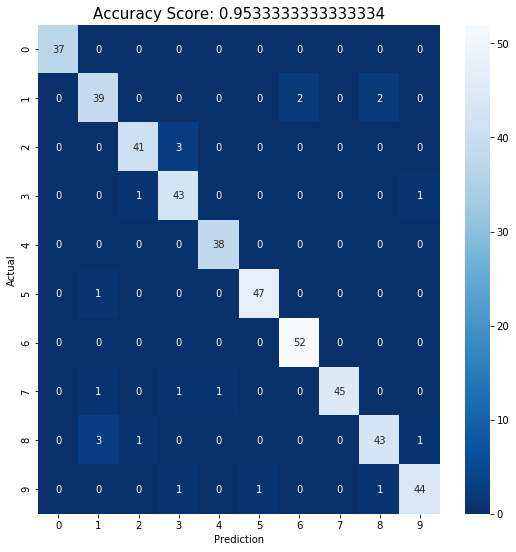

In [94]:
print_heatmap(cm, score)

In [95]:
misclassifcations = get_misclassified_index(y_pred, y_test)

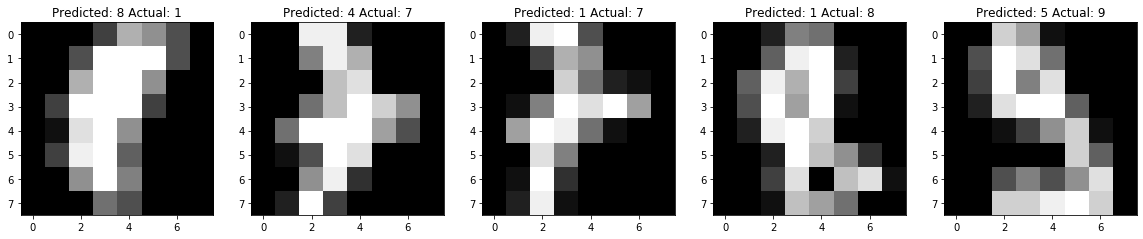

In [96]:
plot_misclassifications(misclassifcations)

In [97]:
mnist = fetch_mldata('MNIST original')

C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [98]:
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=.15, random_state=0)

In [99]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(59500, 784)
(59500,)
(10500, 784)
(10500,)


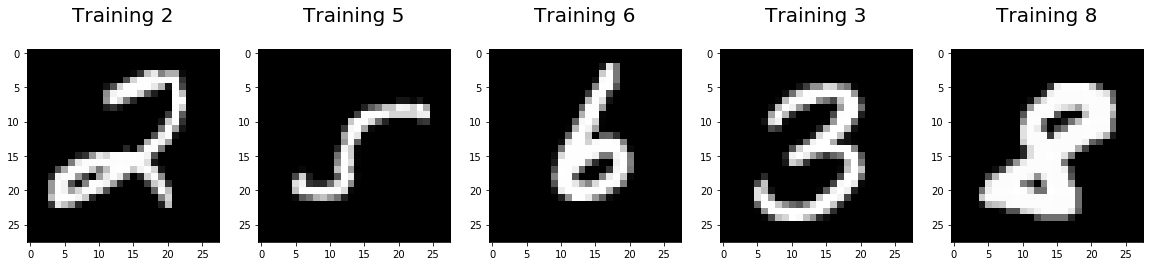

In [100]:
plot_images(x_train, y_train, img_shape=(28, 28))

In [101]:
clf = LogisticRegression(solver='lbfgs')

In [102]:
clf.fit(train_img, train_lbl)

C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarnin

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred = clf.predict(test_img)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

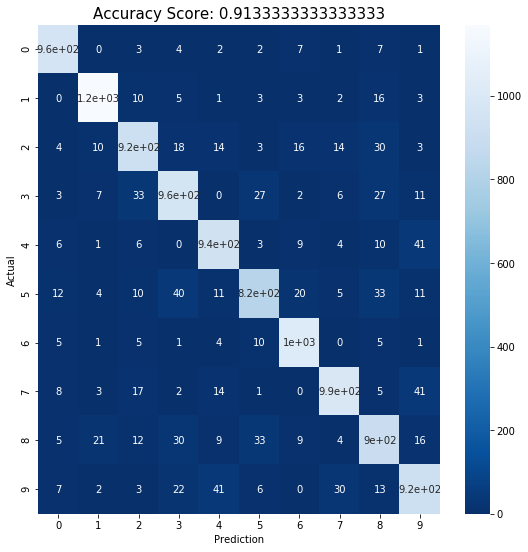

In [104]:
print_heatmap(matrix, score)

In [105]:
misclassifcations = get_misclassified_index(y_pred, y_test)

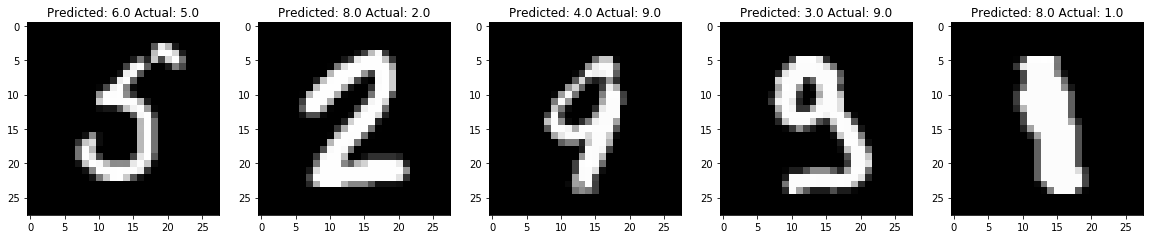

In [106]:
plot_misclassifications(misclassifcations, img_shape=(28, 28))

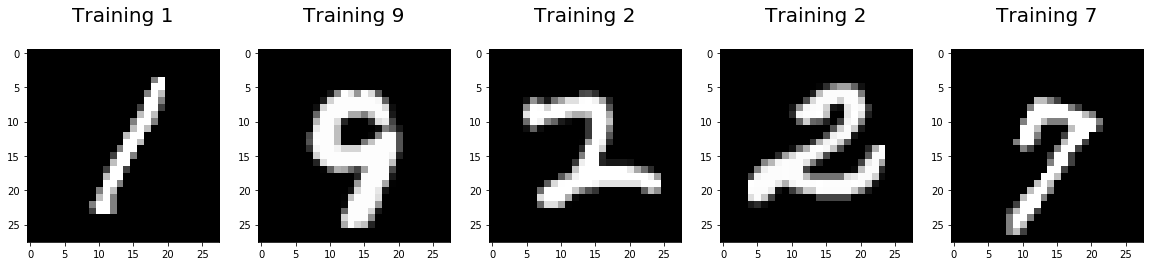

In [107]:
plot_images(x_test, y_test, img_shape=(28, 28))

In [108]:
clf.predict(x_test[0].reshape(1, -1))

array([1.])